# Udacity | Data Analyst Nanodegree | Project 5 - Communicate Data Findings

## Visualization Pisa Data (2012)

**Creation date: 05.07.2020  
Created by Michelle Leemans**


## Table of Contents
1. [Importing libraries](#importing)
1. [Gathering of data](#Gathering)
1. [Assessing the data](#Assessing)
1. [Wrangling of data](#wrangling)
1. [Univariate Exploration of the data](#univariate)  
    5.1 [Visualization 1](#vis1) | What is the distribution of the scores for the different subjects among all the students  
    5.2 [Visualization 2](#vis2) | What is male/female ratio of the pisa dataset?  
    5.3 [Visualization 3](#vis3) | What is the distribution of the data collection of the students among the different countries?  
    5.4 [Visualization 4](#vis4) | Which countries host the most "high  scoring" students, what is the amount of students, with respect to each country and subject?  
    
1. [Bivariate Exploration of the data](#bivariate)  
    6.1  [Visualization 5](#vis5) | What is the male/female ratio of the students the highstest enrolled countries in the pisa study?  
    6.2 [Visualization 6](#vis6)  | How are males/females scoring for the 3 different subjects?   
    6.3 [Visualization 7](#vis7) | What are the mean scores for students from different countries for the 3 different subjects?     
    6.4 [Visualization 8](#vis8) | What is the gender distribution in the top 90,95,99th percentile of students?  
        
1. [Multivariate Exploration of the data](#multivariate)  
    7.1 [Visualization 9](vis#9) | Are students who score high on one subject are likely to score high on another subject?  
    7.2 [Visualization 10](vis#10) | Does the highest degree of the parents have an influence on the mean scores of the student for the three individual subjects?



## 1. Importing libraries <a id='importing'>

In [1]:
import requests
import os
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from zipfile import ZipFile
import io
import glob

## Gathering of data<a id='Gathering'>

**1) Downloaded data manually from the following website: http://stat-computing.org/dataexpo/2009/the-data.html**  
**2) Unzip the .csv.zip file - code:**  
zf = ZipFile('PATH/pisa2012.csv.zip', 'r')  
zf.extractall('targetdirectory')  
zf.close()

In [2]:
# check the endcoding of the csv file
with open('pisa2012.csv') as f:
    print(f)

<_io.TextIOWrapper name='pisa2012.csv' mode='r' encoding='cp1252'>


In [3]:
# read in dataframe
df = pd.read_csv('pisa2012.csv', encoding='cp1252', low_memory = False)

## Assessing the data<a id='Assessing'>

In [4]:
df.head(3)

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


In [5]:
df.shape

(485490, 636)

## Wrangling of data <a id='wrangling'>

**Since the dataset is very large, I kept and cleaned only the characteristics that I will be using for the visualisation.**  
Kept columns:
1. Country code (CNT)
1. Birth year (ST03Q02)
1. Gender (ST04Q01)
1. At home mother (ST11Q01)
1. At home father (ST11Q02)
1. Highest degree mother (ST13Q01)
1. Highest degree father (ST17Q01)
1. Plausible value (1-5) in mathematics (PV1MATH,PV2MATH, PV3MATH, PV4MATH) 
1. Plausible value (1-5) in reading (PV1READ, PV2READ, PV3READ, PV4READ, PV5READ)
1. Plausible value (1-5) in science (PV1SCIE, PV2SCIE, PV3SCIE, PV4SCIE)
1. Country of birth self (ST20Q01)
1. Country of birth mother (ST20Q01)
1. Country of birth father (ST20Q03)






In [6]:
df_clean=df.copy()

In [7]:
# Select only columns that are needed
df_clean=df_clean[['CNT', 'ST03Q02', 'ST04Q01', 'ST11Q01', 'ST11Q02', 'ST13Q01', 'ST17Q01','PV1MATH','PV2MATH', 'PV3MATH',
                   'PV4MATH','PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ','PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE'
                   ,'PV5SCIE','ST20Q01', 'ST20Q02', 'ST20Q03']]
#test
df_clean.head(3)

,CNT,ST03Q02,ST04Q01,ST11Q01,ST11Q02,ST13Q01,ST17Q01,PV1MATH,PV2MATH,PV3MATH,...,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,ST20Q01,ST20Q02,ST20Q03
0,Albania,1996,Female,Yes,Yes,<ISCED level 3A>,<ISCED level 3A>,406.8469,376.4683,344.5319,...,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877,Country of test,Country of test,Country of test
1,Albania,1996,Female,Yes,Yes,<ISCED level 3A>,<ISCED level 3A>,486.1427,464.3325,453.4273,...,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116,Country of test,Country of test,Country of test
2,Albania,1996,Female,Yes,Yes,"<ISCED level 3B, 3C>",<ISCED level 3A>,533.2684,481.0796,489.6479,...,431.3938,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643,Country of test,Country of test,Country of test


In [8]:
# Compute the average of the obtained PISA scores for each student in a particular subject and drop the unnecesarry columns
df_clean['Math_score'] = (df_clean['PV1MATH']+ df_clean['PV2MATH']+ df_clean['PV3MATH']+df_clean['PV4MATH']+ df_clean['PV5MATH'])/5
df_clean.drop(['PV1MATH','PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH'], axis=1, inplace=True)


df_clean['Reading_score'] = (df_clean['PV1READ']+ df_clean['PV2READ']+ df_clean['PV3READ']+df_clean['PV4READ']+ df_clean['PV5READ'])/5
df_clean.drop(['PV1READ','PV2READ', 'PV3READ', 'PV4READ', 'PV5READ'], axis=1, inplace=True)

df_clean['Science_score'] = (df_clean['PV1SCIE']+ df_clean['PV2SCIE']+ df_clean['PV3SCIE']+df_clean['PV4SCIE']+ df_clean['PV5SCIE'])/5
df_clean.drop(['PV1SCIE','PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE'], axis=1, inplace=True)

#Test
df_clean.head(3)


,CNT,ST03Q02,ST04Q01,ST11Q01,ST11Q02,ST13Q01,ST17Q01,ST20Q01,ST20Q02,ST20Q03,Math_score,Reading_score,Science_score
0,Albania,1996,Female,Yes,Yes,<ISCED level 3A>,<ISCED level 3A>,Country of test,Country of test,Country of test,366.18634,261.01424,371.91348
1,Albania,1996,Female,Yes,Yes,<ISCED level 3A>,<ISCED level 3A>,Country of test,Country of test,Country of test,470.56396,384.68832,478.12382
2,Albania,1996,Female,Yes,Yes,"<ISCED level 3B, 3C>",<ISCED level 3A>,Country of test,Country of test,Country of test,505.53824,405.18154,486.60946


In [9]:
#Rename columns with more comprehensible name 
df_clean.rename(columns={"CNT": "Country", "ST03Q02": "Birth_year", "ST04Q01": "Gender", "ST11Q01": "At_home_mother", 
                         "ST11Q02": "At_home_father", "ST13Q01": "Highest_degree_mother", "ST17Q01": "Highest_degree_father",
                         'ST20Q01':'Country_of_birth_self', 'ST20Q02': 'Country_of_birth_mother', 
                         'ST20Q03': 'Country_of_birth_father'}, inplace=True)

In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Country                  485490 non-null  object 
 1   Birth_year               485490 non-null  int64  
 2   Gender                   485490 non-null  object 
 3   At_home_mother           460559 non-null  object 
 4   At_home_father           441036 non-null  object 
 5   Highest_degree_mother    457979 non-null  object 
 6   Highest_degree_father    443261 non-null  object 
 7   Country_of_birth_self    476363 non-null  object 
 8   Country_of_birth_mother  472518 non-null  object 
 9   Country_of_birth_father  469141 non-null  object 
 10  Math_score               485490 non-null  float64
 11  Reading_score            485490 non-null  float64
 12  Science_score            485490 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 48.2+ MB


## Univariate Exploration of the data <a id='univariate'>

### Visualization 1 | What is the distribution of the scores for the different subjects among all the students? <a id='vis1'>

In [11]:
df_clean['Math_score'].describe()

count    485490.000000
mean        469.651234
std         100.786610
min          54.767080
25%         396.019620
50%         465.734520
75%         540.123060
max         903.107960
Name: Math_score, dtype: float64

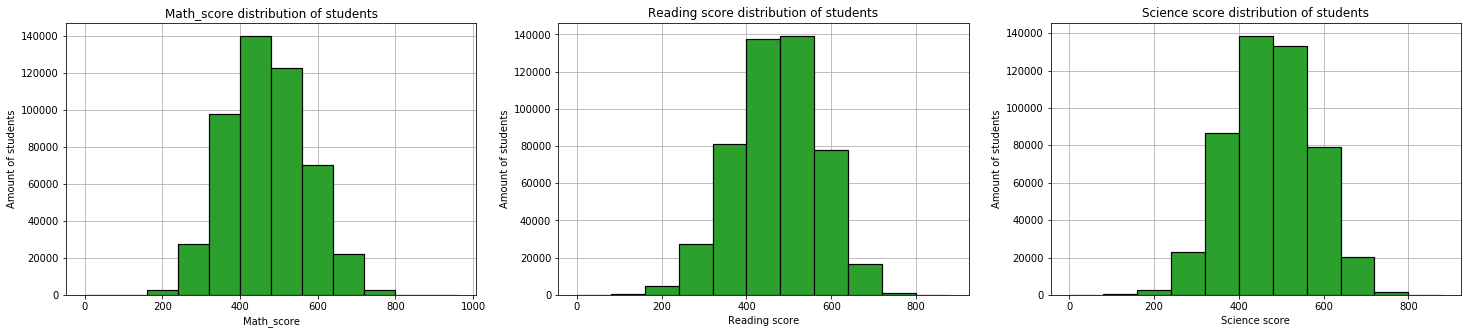

In [12]:
plt.figure(figsize =[25,5])
base_color=sb.color_palette()[2]

axis = plt.subplot(1,3,1)
bin_edges = np.arange(0, df_clean['Math_score'].max()+80,80)
plt.hist(data = df_clean, x = 'Math_score', bins = bin_edges, edgecolor='black', linewidth=1.2, alpha = 1, color = base_color)
plt.grid(True);
plt.xlabel('Math_score')
plt.ylabel('Amount of students')
plt.title('Math_score distribution of students')
axis.set_axisbelow(True);

axis = plt.subplot(1,3,2)
bin_edges = np.arange(0, df_clean['Reading_score'].max()+80,80)
plt.grid(True)
plt.hist(data = df_clean, x = 'Reading_score', bins = bin_edges, edgecolor='black', linewidth=1.2, alpha = 1, color = base_color);
plt.xlabel('Reading score')
plt.ylabel('Amount of students')
plt.title('Reading score distribution of students');
axis.set_axisbelow(True);

axis = plt.subplot(1,3,3)
bin_edges = np.arange(0, df_clean['Science_score'].max()+80,80)
plt.hist(data = df_clean, x = 'Science_score', bins = bin_edges, edgecolor='black', linewidth=1.2, alpha = 1, color = base_color);
plt.xlabel('Science score')
plt.grid(True)
plt.ylabel('Amount of students')
plt.title('Science score distribution of students');
axis.set_axisbelow(True);



**<ins>Observation: </ins> The distribution of the scores of mathematics, reading and science among all the students in the Pisa study are normally distributed.**

### Visualization 2 | What is male/female ratio of the pisa dataset? <a id='vis2'>

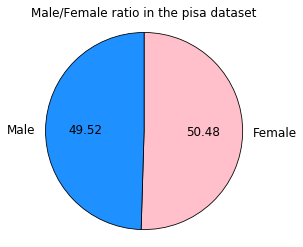

In [13]:
labels = df_clean['Gender'].value_counts().index
plt.pie(df_clean['Gender'].value_counts(), labels = labels, startangle = 90,autopct='%1.2f',
       counterclock = False, textprops={'fontsize': 12},
           colors = ['pink','dodgerblue'], wedgeprops={"edgecolor":"k",'linewidth': 0.8});
plt.title('Male/Female ratio in the pisa dataset')
plt.axis('square');

**<ins>Observation: </ins>The male/female ratio is almost equal in the pisa dataset.**

### Visualization 3 | What is the distribution of the data collection of the students among the different countries?<a id='vis3'>

In [14]:
df_clean['Country'].value_counts()

Mexico                      33806
Italy                       31073
Spain                       25313
Canada                      21544
Brazil                      19204
                            ...  
Florida (USA)                1896
Perm(Russian Federation)     1761
Massachusetts (USA)          1723
Connecticut (USA)            1697
Liechtenstein                 293
Name: Country, Length: 68, dtype: int64

In [15]:
df_clean['Country_of_birth_mother'].value_counts()

Country of test    397405
Other country       75113
Name: Country_of_birth_mother, dtype: int64

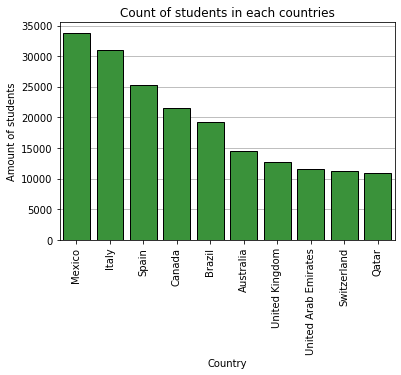

In [16]:
base_color=sb.color_palette()[2]
order = df_clean['Country'].value_counts().iloc[:10].index
axis = plt.subplot(1,1,1)
sb.countplot(data = df_clean, x = 'Country', edgecolor='black', linewidth=1, alpha = 1, color = base_color, order = order)
plt.grid(True, axis = 'y');
plt.xlabel('Country')
plt.ylabel('Amount of students')
plt.title('Count of students in each countries')
plt.xticks(rotation=90)
axis.set_axisbelow(True);



**<ins> Observation: </ins> The highest amount of students within the Pisa study in 2012 comes from Mexico, followed by Italy, Spain and Canada.**

### Visualization 4 | Which countries host the most "high  scoring" students, what is the amount of students, with respect to each country and subject?<a id='vis4'>

In [17]:
# Retrieve amounts of students with scores above 700 points in each of the subjects

high_math_score = df_clean[df_clean['Math_score'] > 800]['Country'].value_counts()
high_reading_score = df_clean[df_clean['Reading_score'] > 800]['Country'].value_counts()
high_science_score = df_clean[df_clean['Science_score'] > 800]['Country'].value_counts()

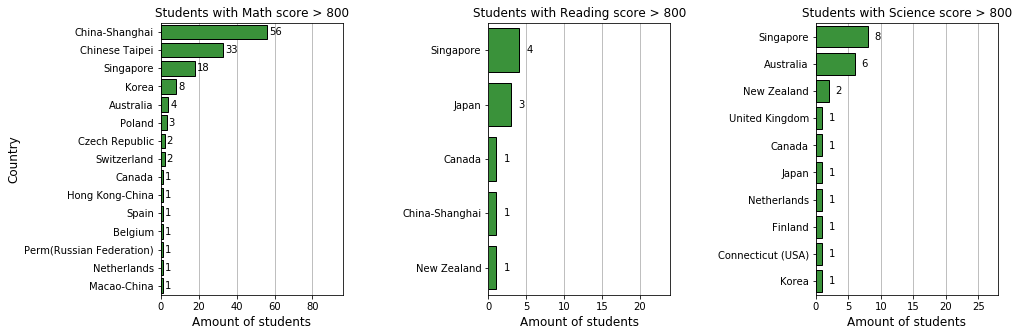

In [18]:
plt.figure(figsize = [15, 5])
plt.subplots_adjust(wspace = 0.8) 

#Plot 1 - Math score
axis = plt.subplot(1, 3, 1)

sb.barplot(data = df_clean, y = high_math_score.index, x = high_math_score.values, color = sb.color_palette()[2], 
           edgecolor='black', linewidth=1)

plt.title('Students with Math score > 800', fontsize=12);
plt.xlabel('Amount of students', fontsize=12)
plt.ylabel('Country', fontsize=12);
x_lim_max = high_math_score.values[0] + 40
plt.xlim(0, x_lim_max);  
plt.grid(axis='x'); 
axis.set_axisbelow(True);

indexes, labels = plt.yticks()
for index, label in zip(indexes, labels):
    plt.text(y = index, x = high_math_score[label.get_text()] + 1, s = high_math_score[label.get_text()], va = 'center')

    
    

#Plot 2 - Reading score
plt.subplot(1, 3, 2)
sb.barplot(y = high_reading_score.index, x = high_reading_score.values, color = sb.color_palette()[2]
          , edgecolor='black', linewidth=1)

plt.title('Students with Reading score > 800', fontsize=12);
plt.xlabel('Amount of students', fontsize=12);
x_lim_max = high_reading_score.values[0] + 20
plt.xlim(0, x_lim_max)
plt.grid(axis='x');  


indexes, labels = plt.yticks()
for index, label in zip(indexes, labels):
    plt.text(y = index, x = high_reading_score[label.get_text()] + 1, s = high_reading_score[label.get_text()], va = 'center')

#Plot 3 - Science score
axis = plt.subplot(1, 3, 3)
sb.barplot(y = high_science_score.index, x = high_science_score.values, color = sb.color_palette()[2]
          , edgecolor='black', linewidth=1)

x_lim_max = high_science_score.values[0] + 20
plt.xlim(0, x_lim_max);  
plt.title('Students with Science score > 800', fontsize=12);
plt.xlabel('Amount of students', fontsize=12);
plt.grid(axis='x'); 
axis.set_axisbelow(True);


indexes, labels = plt.yticks()
for index, label in zip(indexes, labels):
    plt.text(y = index, x = high_science_score[label.get_text()] + 1, s = high_science_score[label.get_text()], va = 'center')

**<ins>Obeservation: </ins>The highest amount gifted students in mathematics are in China-Shanghai, followed by chinese Taipei and Singapore.
The highest amount gifted students in reading are in Singapore, closely followed by Japan.**

## Bivariate Exploration of the data <a id='bivariate'>

### Visualization 5 | What is the male/female ratio of the students the highstest enrolled countries in the pisa study?<a id='vis5'>

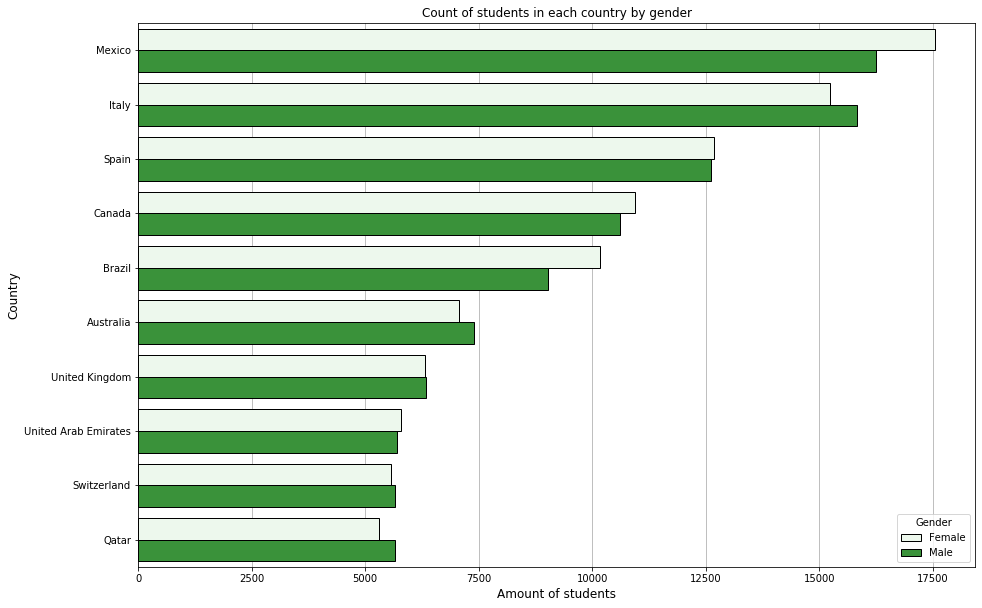

In [19]:
plt.figure(figsize = [15, 10])
axis = plt.subplot(1, 1, 1)
base_colore = sb.color_palette()[2]
order = df_clean['Country'].value_counts().iloc[:10].index

sb.countplot(data = df_clean,  y= 'Country', hue = 'Gender', color = base_color, order = order,edgecolor='black', linewidth=1);
plt.grid(axis='x'); 
axis.set_axisbelow(True);
plt.xlabel('Amount of students', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Count of students in each country by gender', fontsize=12)
indexes, labels = plt.yticks()


**<ins>Observation: </ins>The male/female ratio seems to be equilibrated among the highest enrolled countries in the pisa study.**

### Visualization 6 | How are males/females scoring for the 3 different subjects?<a id='vis6'>

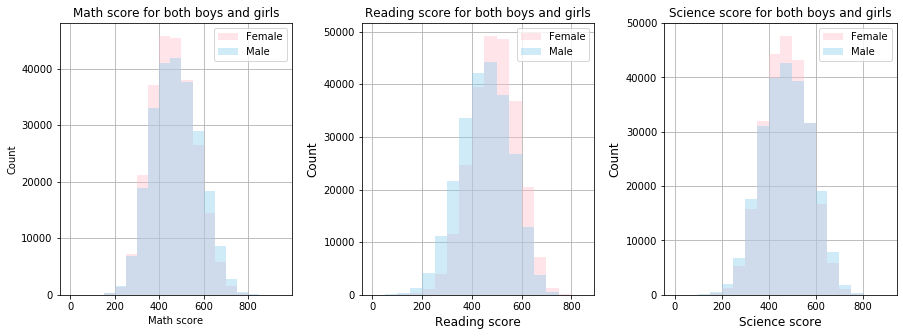

In [20]:
plt.figure(figsize = [15, 5])
plt.subplots_adjust(wspace = 0.3) 

#Plot 1 - Math score
axis = plt.subplot(1, 3, 1)
bin_edges = np.arange(0,df_clean['Math_score'].max()+50,50)
plt.hist(data = df_clean.query("Gender=='Female'"), x = 'Math_score',alpha = 0.4 , bins = bin_edges, label = 'Female', color = "pink");
plt.hist(data = df_clean.query("Gender=='Male'"), x = 'Math_score',alpha = 0.4 , bins = bin_edges, label = 'Male', color = "skyblue");
plt.legend();
plt.xlabel('Math score')
plt.ylabel('Count')
plt.title('Math score for both boys and girls')
plt.grid(); 
axis.set_axisbelow(True);

#Plot 2 - Reading score
axis = plt.subplot(1, 3, 2)
bin_edges = np.arange(0,df_clean['Reading_score'].max()+50,50)
plt.hist(data = df_clean.query("Gender=='Female'"), x = 'Reading_score',alpha = 0.4 , bins = bin_edges, label = 'Female', color = "pink");
plt.hist(data = df_clean.query("Gender=='Male'"), x = 'Reading_score',alpha = 0.4 , bins = bin_edges, label = 'Male', color = "skyblue");
plt.legend();
plt.xlabel('Reading score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Reading score for both boys and girls', fontsize=12)
plt.grid(); 
axis.set_axisbelow(True);


#Plot 3 - Science score
axis = plt.subplot(1, 3, 3)
bin_edges = np.arange(0,df_clean['Science_score'].max()+50,50)
plt.hist(data = df_clean.query("Gender=='Female'"), x = 'Science_score',alpha = 0.4 , bins = bin_edges, label = 'Female', color = "pink");
plt.hist(data = df_clean.query("Gender=='Male'"), x = 'Science_score',alpha = 0.4 , bins = bin_edges, label = 'Male', color = "skyblue");
plt.legend();
plt.xlabel('Science score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Science score for both boys and girls', fontsize=12)
plt.grid(); 
axis.set_axisbelow(True);


**<ins>Observation:</ins> Math score tends to be higher for boys compared to girls in contrast to the reading score where girls seem to get an higher score. The science score seems to be evenly disributed for both boys and girls.**

### Visualization 7 | What are the mean scores for students from different countries for the 3 different subjects? <a id='vis7'>

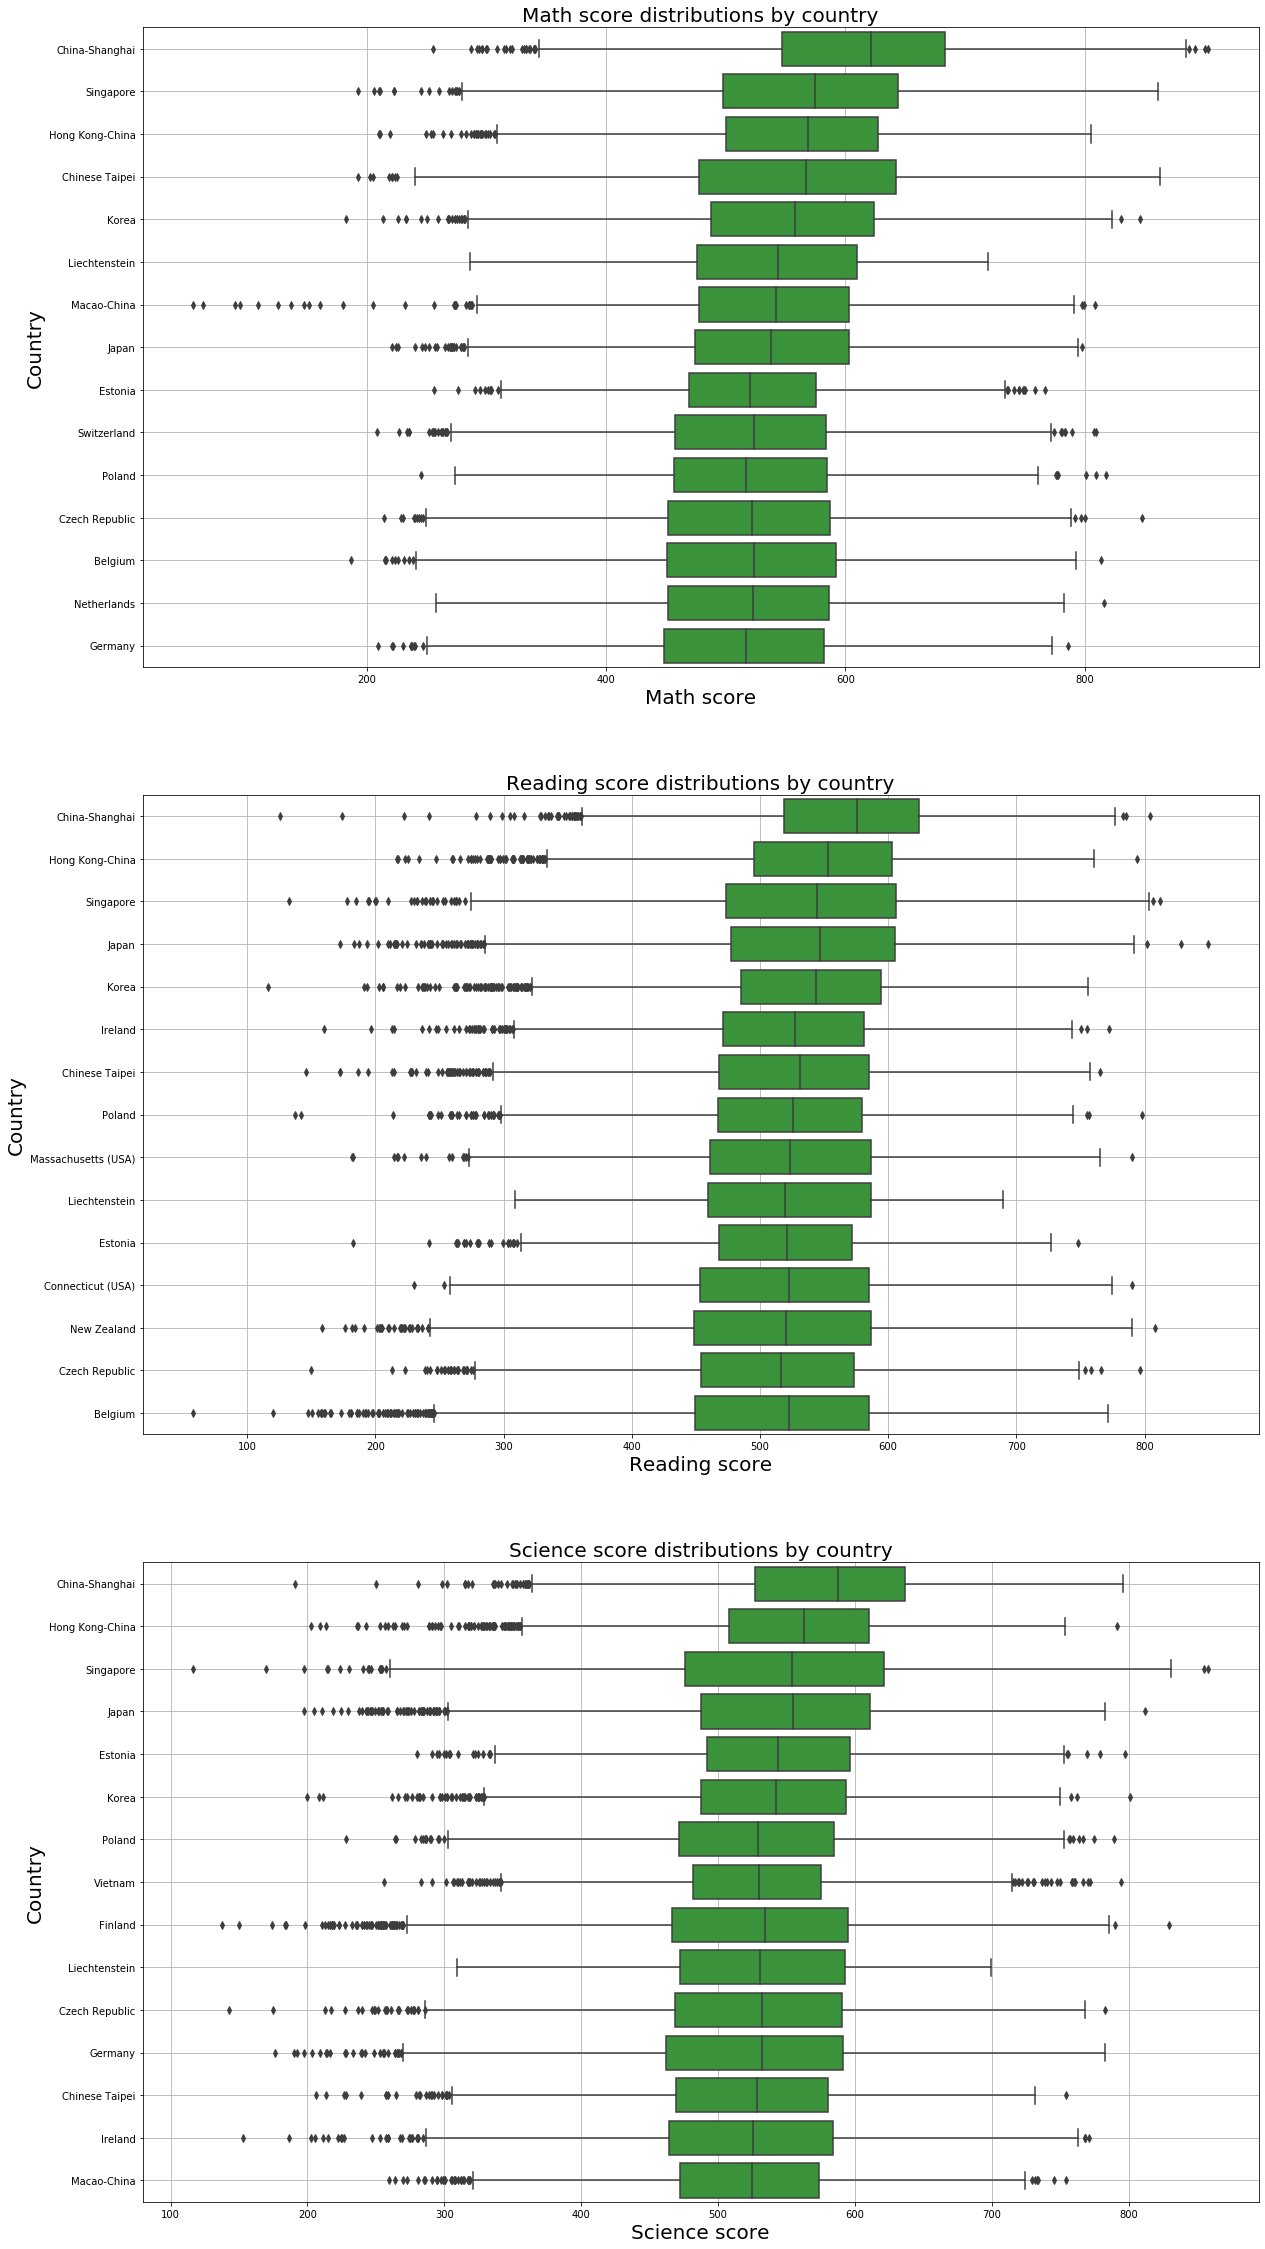

In [21]:
plt.figure(figsize = [20, 40])
plt.subplots_adjust(hspace = 0.2) 

#Plot 1 - Math score
axis = plt.subplot(3,1,1)
math_score_by_country = df_clean.groupby('Country')['Math_score'].mean().sort_values(ascending = False).iloc[:15].index
base_colore = sb.color_palette()[2]
sb.boxplot(data = df_clean, x= 'Math_score', y= 'Country',
           order =math_score_by_country, color = base_color );
plt.xlabel('Math score', fontsize=20)
plt.ylabel('Country', fontsize=20)
plt.title('Math score distributions by country', fontsize=20)
plt.grid(); 
axis.set_axisbelow(True);



#Plot 2 - Reading score
axis = plt.subplot(3,1,2)
reading_score_by_country = df_clean.groupby('Country')['Reading_score'].mean().sort_values(ascending = False).iloc[:15].index
base_colore = sb.color_palette()[2]
sb.boxplot(data = df_clean, x= 'Reading_score', y= 'Country',
           order = reading_score_by_country, color = base_color );
plt.xlabel('Reading score', fontsize=20)
plt.ylabel('Country', fontsize=20)
plt.title('Reading score distributions by country', fontsize=20)
plt.grid(); 
axis.set_axisbelow(True);



#Plot 3 - Science score
axis = plt.subplot(3,1,3)
science_score_by_country = df_clean.groupby('Country')['Science_score'].mean().sort_values(ascending = False).iloc[:15].index
base_colore = sb.color_palette()[2]
sb.boxplot(data = df_clean, x= 'Science_score', y= 'Country', 
           order = science_score_by_country, color = base_color );
plt.xlabel('Science score', fontsize=20)
plt.ylabel('Country', fontsize=20)
plt.title('Science score distributions by country', fontsize=20)
plt.grid(); 
axis.set_axisbelow(True);

**<ins>Observation:</ins> Highest means for 3 different subjects are observed in chinese countries. Students from Poland and Czech Republic seem to have high mean scores given they appear for the 3 different subjects in the top 15 of all countries.**

### Visualization 8 | What is the gender distribution in the top 90,95,99th percentile of students? <a id='vis8'>

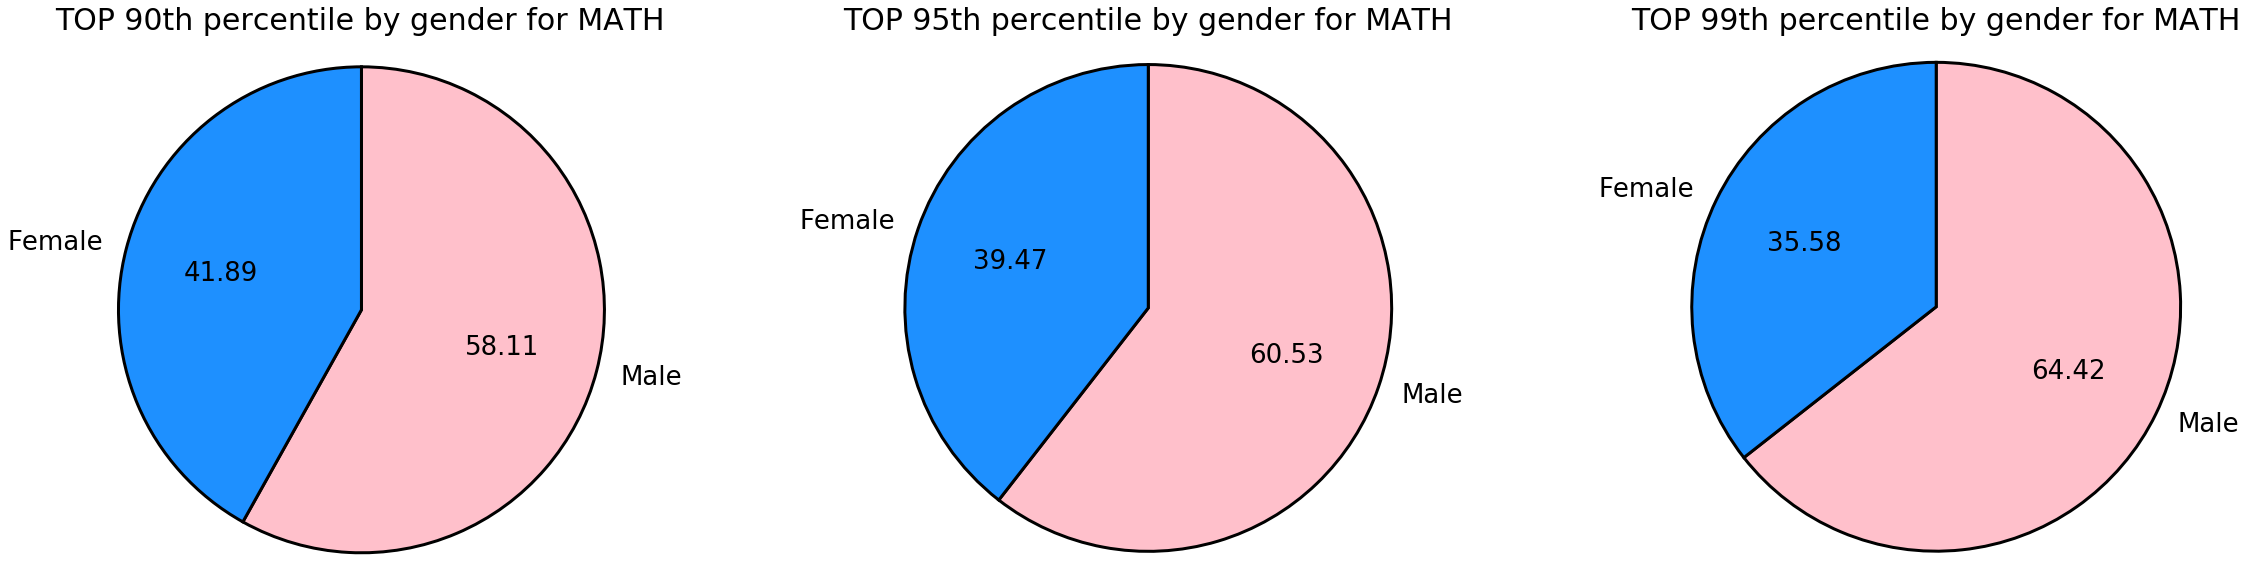

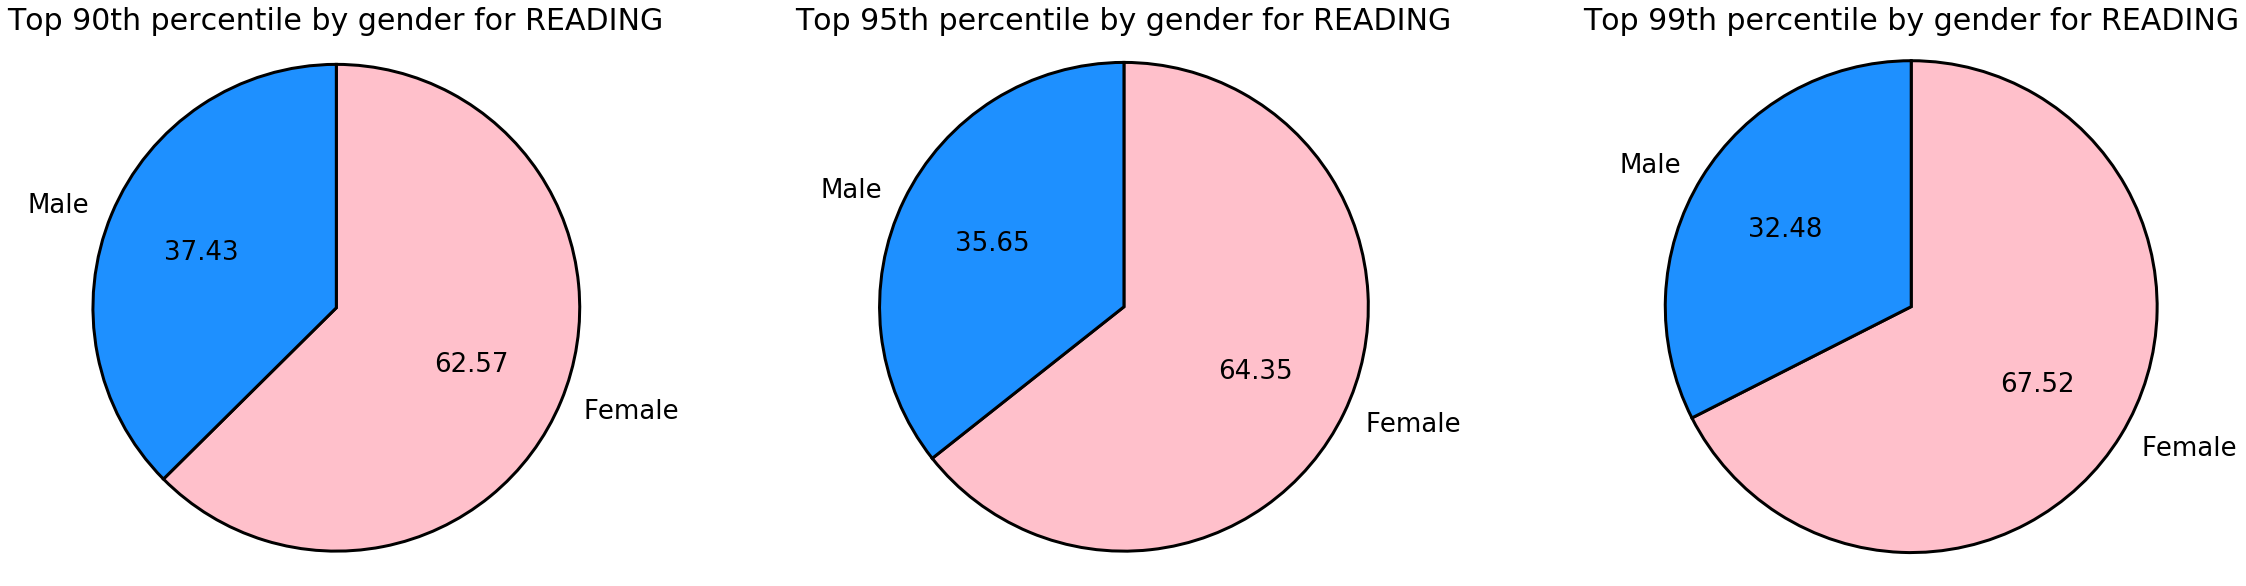

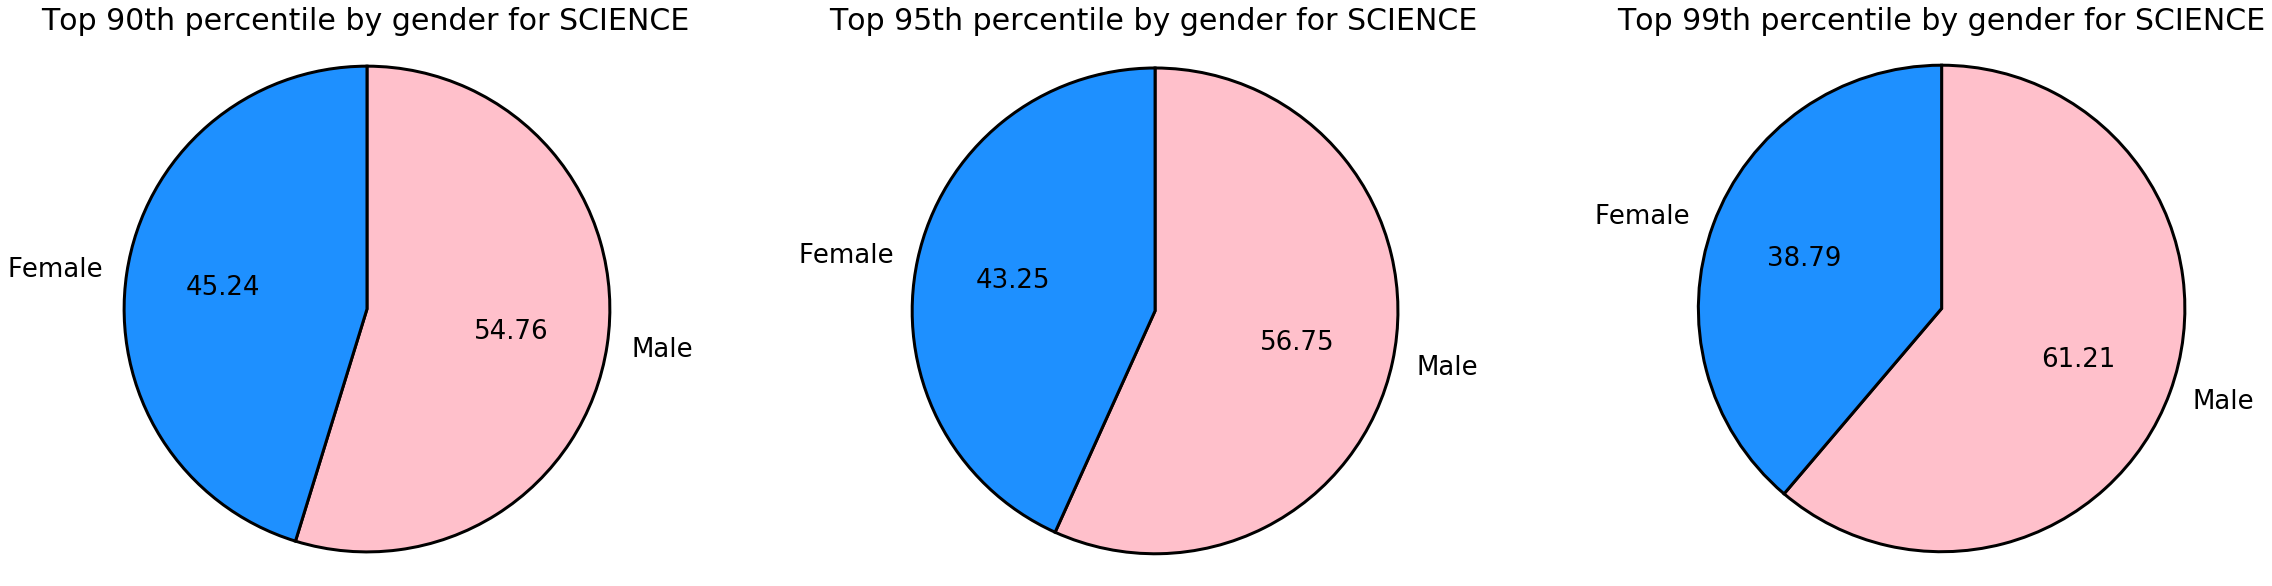

In [22]:
fig, ax=plt.subplots(nrows=1, ncols=3, figsize=(40,10))
plt.subplots_adjust(hspace = 5) 

df_math_90 = df_clean.query('Math_score>=@df_clean.Math_score.quantile(.90)')
df_math_95 = df_clean.query('Math_score>=@df_clean.Math_score.quantile(.95)')
df_math_99 = df_clean.query('Math_score>=@df_clean.Math_score.quantile(.99)')

percent=[90,95,99]
ax=ax.flatten()
for i in range(3):
    plt.sca(ax[i])
    df=eval('df_math_'+str(percent[i]))
    plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index
            ,startangle=90,counterclock=False,autopct='%.2f', textprops={'fontsize': 26},
           colors = ['pink','dodgerblue'], wedgeprops={"edgecolor":"k",'linewidth': 3} )
    plt.axis('square')
    plt.title('TOP '+ str(percent[i])+'th percentile by gender for MATH', fontsize=30)    
    

fig, ax=plt.subplots(nrows=1, ncols=3, figsize=(40,10))
plt.subplots_adjust(hspace = 5) 
df_reading_90=df_clean.query('Reading_score>=@df_clean.Reading_score.quantile(.90)')
df_reading_95=df_clean.query('Reading_score>=@df_clean.Reading_score.quantile(.95)')
df_reading_99=df_clean.query('Reading_score>=@df_clean.Reading_score.quantile(.99)')

percent=[90,95,99]
ax=ax.flatten()
for i in range(3):
    plt.sca(ax[i])
    df=eval('df_reading_'+str(percent[i]))
    plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index
            ,startangle=90,counterclock=False,autopct='%.2f', textprops={'fontsize': 26},
           colors = ['pink','dodgerblue'], wedgeprops={"edgecolor":"k",'linewidth': 3})
    plt.axis('square')
    plt.title('Top '+ str(percent[i])+'th percentile by gender for READING', fontsize=30)
    

df_science_90=df_clean.query('Science_score>=@df_clean.Reading_score.quantile(.90)')
df_science_95=df_clean.query('Science_score>=@df_clean.Reading_score.quantile(.95)')
df_science_99=df_clean.query('Science_score>=@df_clean.Reading_score.quantile(.99)')


fig, ax=plt.subplots(nrows=1, ncols=3, figsize=(40,10))
plt.subplots_adjust(hspace = 5)
percent=[90,95,99]
ax=ax.flatten()
for i in range(3):
    plt.sca(ax[i])
    df=eval('df_science_'+str(percent[i]))
    plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index
            ,startangle=90,counterclock=False,autopct='%.2f', textprops={'fontsize': 26},
           colors = ['pink','dodgerblue'], wedgeprops={"edgecolor":"k",'linewidth': 3} )
    plt.axis('square')
    plt.title('Top '+ str(percent[i])+'th percentile by gender for SCIENCE', fontsize=30)

**<ins>Observation:</ins> The gender distribution is dependant on the subject. Both in science and mathematics, going towards a higher percentile, more boys achieved a higher scores whereas in reading, more girls obtained a higher score going to the higest percentile of scores.**

## Multivariate Exploration of the data <a id='multivariate'>

### Visualization 9 | Are students who score high on one subject are likely to score high on another subject?<a id='vis9'>

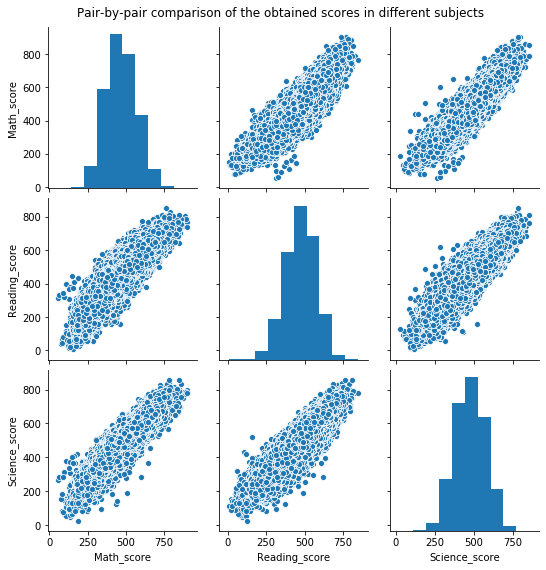

In [23]:
grid = sb.pairplot(data = df_clean, vars=["Math_score", "Reading_score", "Science_score"]);
grid.fig.suptitle("Pair-by-pair comparison of the obtained scores in different subjects", y = 1.03);

**<ins>Observation:</ins> There is a positive correlation between scores of different subject.**

### Visualization 10 |  Does the highest degree of the parents have an influence on the mean scores of the student for the 3 individual subjects? <a id='vis10'>
    

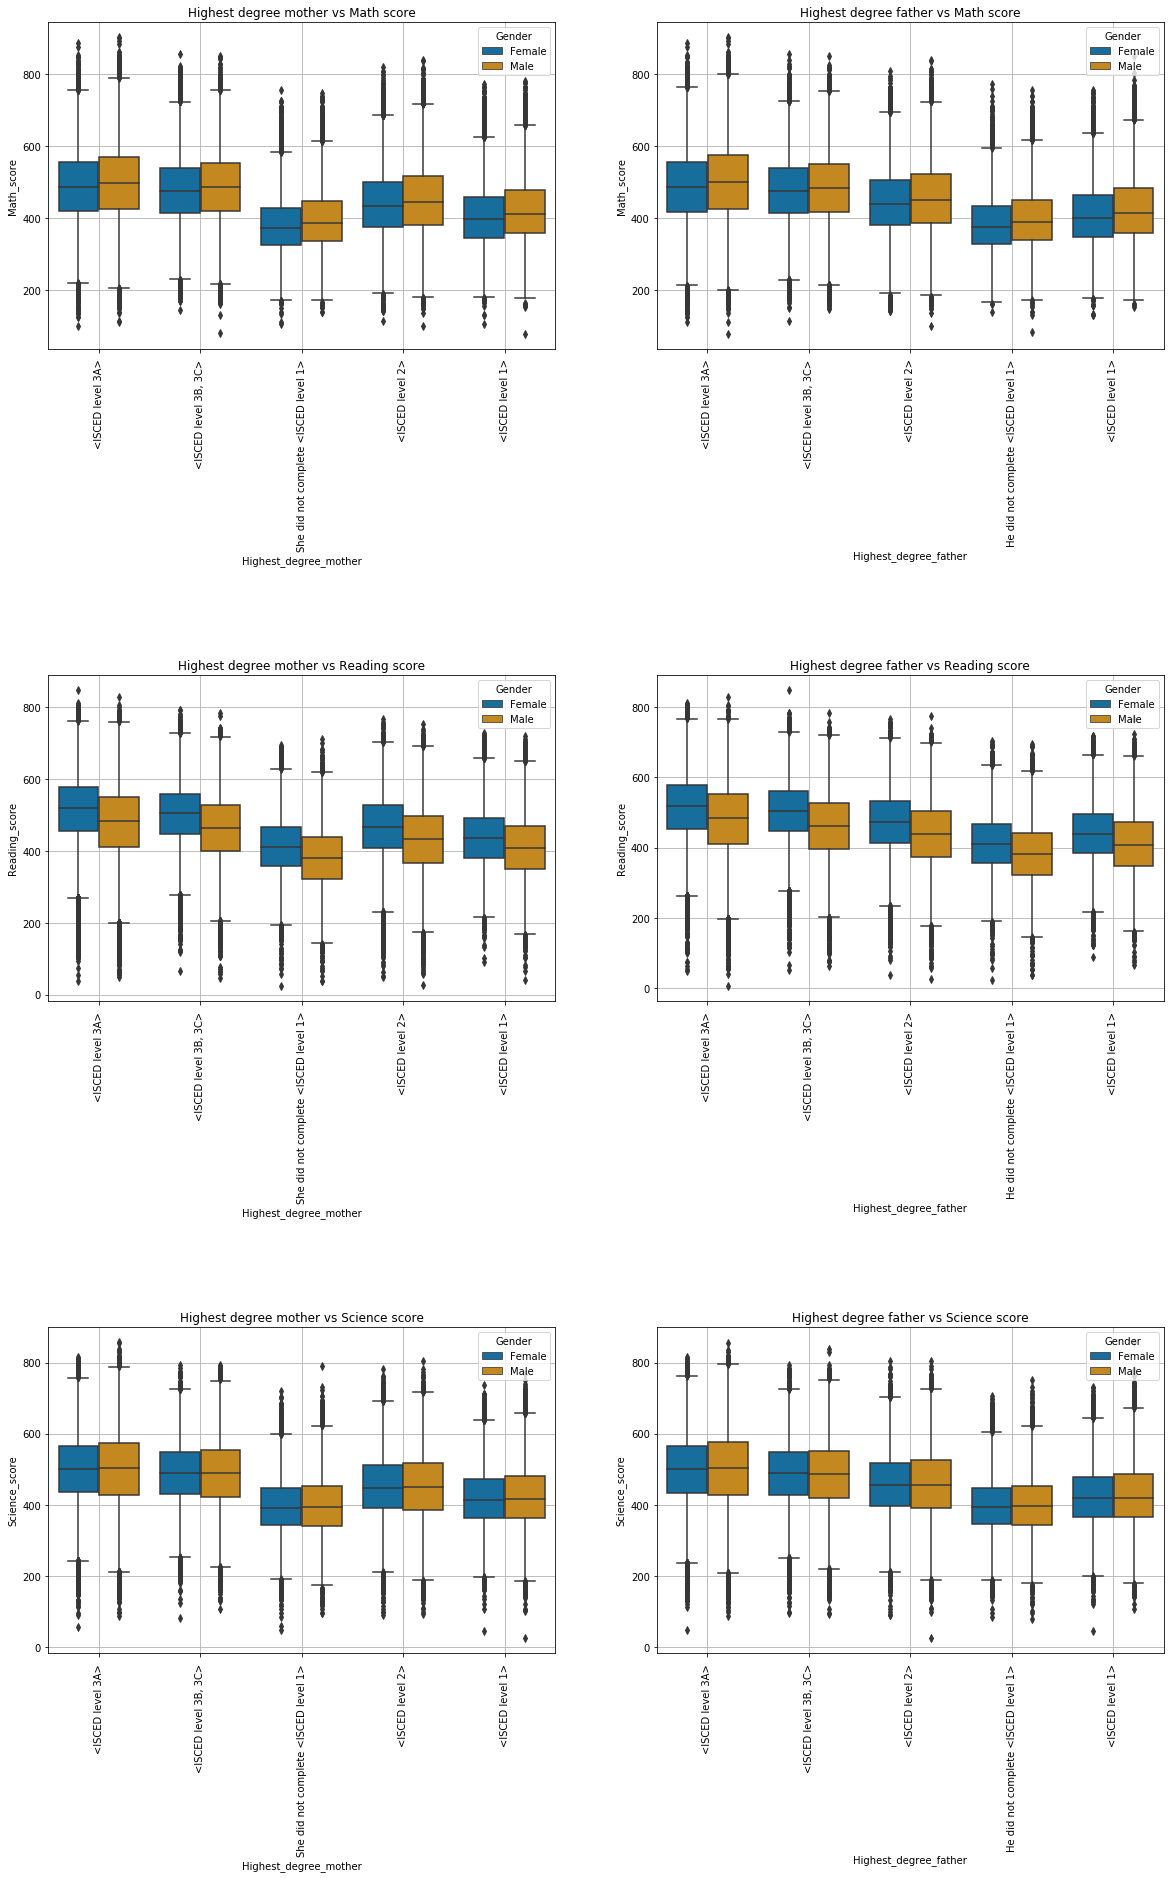

In [24]:
plt.figure(figsize = [20, 30])
plt.subplots_adjust(hspace = 1) 

plt.subplot(3,2,1)
axis = sb.boxplot(x='Highest_degree_mother', y='Math_score',hue = 'Gender', data=df_clean, palette="colorblind" )
plt.xticks(rotation=90);
plt.grid(); 
axis.set_axisbelow(True);
plt.title('Highest degree mother vs Math score');



plt.subplot(3,2,2)
axis = sb.boxplot(x='Highest_degree_father', y='Math_score',hue = 'Gender', data=df_clean, palette="colorblind" )
plt.xticks(rotation=90);
plt.grid(); 
axis.set_axisbelow(True);
plt.title('Highest degree father vs Math score');


plt.subplot(3,2,3)
axis = sb.boxplot(x='Highest_degree_mother', y='Reading_score',hue = 'Gender', data=df_clean, palette="colorblind" )
plt.xticks(rotation=90);
plt.grid(); 
axis.set_axisbelow(True);
plt.title('Highest degree mother vs Reading score');


plt.subplot(3,2,4)
axis = sb.boxplot(x='Highest_degree_father', y='Reading_score',hue = 'Gender', data=df_clean, palette="colorblind" )
plt.xticks(rotation=90);
plt.grid(); 
axis.set_axisbelow(True);
plt.title('Highest degree father vs Reading score');

plt.subplot(3,2,5)
axis = sb.boxplot(x='Highest_degree_mother', y='Science_score',hue = 'Gender', data=df_clean, palette="colorblind" )
plt.xticks(rotation=90);
plt.grid(); 
axis.set_axisbelow(True);
plt.title('Highest degree mother vs Science score');

plt.subplot(3,2,6)
axis = sb.boxplot(x='Highest_degree_father', y='Science_score',hue = 'Gender', data=df_clean, palette="colorblind" )
plt.xticks(rotation=90);
plt.grid(); 
axis.set_axisbelow(True)
plt.title('Highest degree father vs Science score');


**<ins>Observation:</ins> If either the mother or the father obtained no degree or the lowest degree (<ISCED level 1), lower mean scores are observed for the students in all 3 domains. No striking difference in mean scores of 3 subjects are observed between higher obtained degrees of either the mother or the father. There is however the tendency that higher educated parents have childeren with higher mean scores for all three subjects.**

In [25]:
os.system('jupyter nbconvert --to html exploration.ipynb')

0